# Initialization

This notebook will train the Logistic Regression in **One vs Rest** decision function. The Multinomial Logistic Regression is in the Softmax Regression notebook

Connect to Google Drive:

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd '/content/drive/MyDrive/GitHub/emotion-dectection-from-text'

Preparing necessary packages (may need to add more):

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

from preset_function import evaluate_model, draw_learning_curve, load_processed_data

X_train_bow, X_test_bow, X_train_tfidf, X_test_tfidf, \
    X_train_bow_L1, X_test_bow_L1, X_train_tfidf_L1, X_test_tfidf_L1 = load_processed_data('input')

y_train, y_test = load_processed_data('output')

%matplotlib inline

Select dataset:

In [3]:
X_train = X_train_tfidf
X_test = X_test_tfidf

# Basic training

In [4]:
lr_model = LogisticRegression(multi_class='ovr')
lr_model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

Score of on train are:
	- Accuracy score: 0.9216
	- Micro F1 score: 0.9216
	- Macro F1 score: 0.8767
Score of on test are:
	- Accuracy score: 0.8183
	- Micro F1 score: 0.8183
	- Macro F1 score: 0.7390


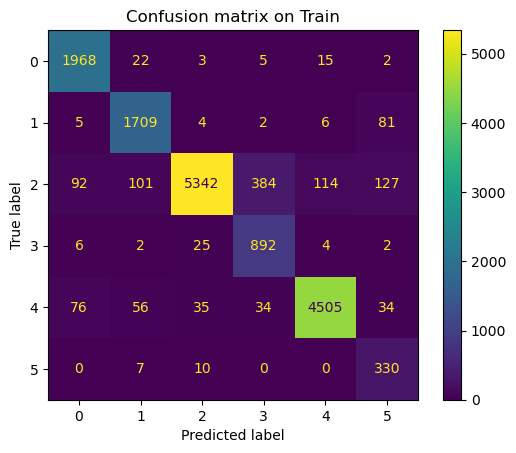

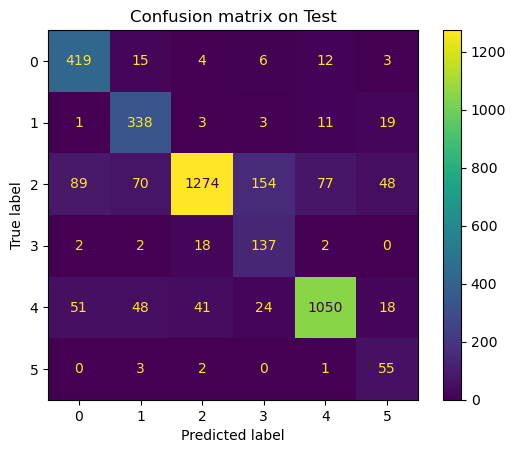

In [5]:
evaluate_model(lr_model, X_train, X_test, y_train, y_test, include_training=True)

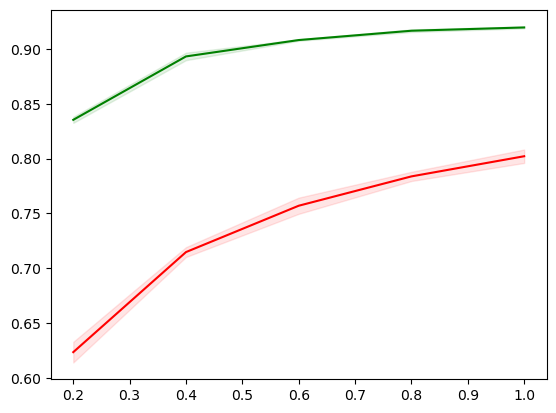

In [6]:
draw_learning_curve(lr_model, X_train, y_train)

# Multiple tuning

## L1 regularization

First, we try to plot the validation score through a list of C from 0.001 to 100

In [7]:
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    lr_model = LogisticRegression(C=c, penalty='l1', solver='liblinear', multi_class='ovr')
    lr_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, lr_model.predict(X_train))
    cv_score = np.mean(cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.001, 0.01, 0.1, 1, 5, 10, 100]
[0.3386875, 0.3386875, 0.520875, 0.8801875, 0.9753125, 0.9925625, 0.992625]
[0.3386875000000001, 0.3386875000000001, 0.38818749999999996, 0.8621874999999999, 0.8720625, 0.8706875000000001, 0.8684999999999998]


[Text(0, 0, '0.001'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.1'),
 Text(3, 0, '1'),
 Text(4, 0, '5'),
 Text(5, 0, '10'),
 Text(6, 0, '100')]

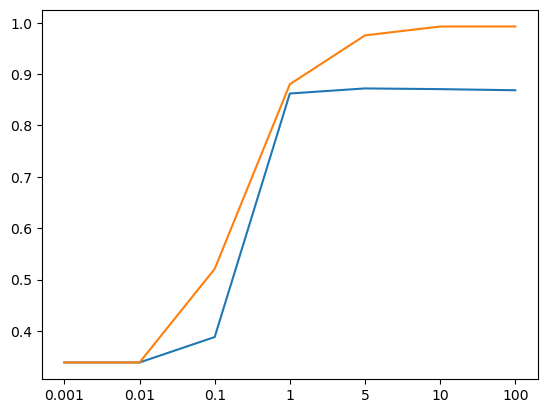

In [9]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We can see the good value of $C$ is near $C = 5$, then we scope to $C=5$:

In [10]:
C_list = [4.1, 4.25, 4.5, 5, 5.25, 5.5, 5.75, 6]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    lr_model = LogisticRegression(C=c, penalty='l1', solver='liblinear', multi_class='ovr')
    lr_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, lr_model.predict(X_train))
    cv_score = np.mean(cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[4.1, 4.25, 4.5, 5, 5.25, 5.5, 5.75, 6]
[0.9584375, 0.9616875, 0.96775, 0.9753125, 0.97875, 0.981125, 0.9828125, 0.984375]
[0.8724375, 0.8726875, 0.8727499999999999, 0.8721249999999999, 0.8714999999999999, 0.8715624999999999, 0.8714375000000001, 0.8716250000000001]


[Text(0, 0, '4.1'),
 Text(1, 0, '4.25'),
 Text(2, 0, '4.5'),
 Text(3, 0, '5'),
 Text(4, 0, '5.25'),
 Text(5, 0, '5.5'),
 Text(6, 0, '5.75'),
 Text(7, 0, '6')]

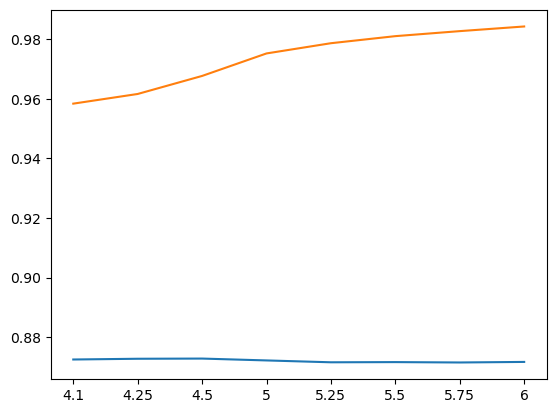

In [11]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We choose $C=4.5$ to be the best one

In [12]:
best_l1_lr_model = LogisticRegression(C=4.5, penalty='l1', solver='liblinear', multi_class='ovr')

Score of on train are:
	- Accuracy score: 0.9677
	- Micro F1 score: 0.9677
	- Macro F1 score: 0.9597
Score of on test are:
	- Accuracy score: 0.8762
	- Micro F1 score: 0.8762
	- Macro F1 score: 0.8420


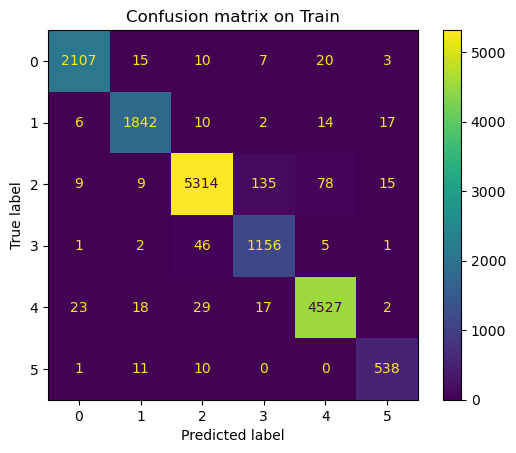

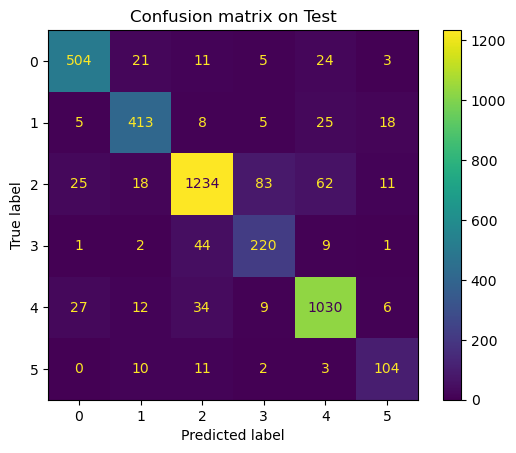

In [13]:
best_l1_lr_model.fit(X_train, y_train)
evaluate_model(best_l1_lr_model, X_train, X_test, y_train, y_test, include_training=True)

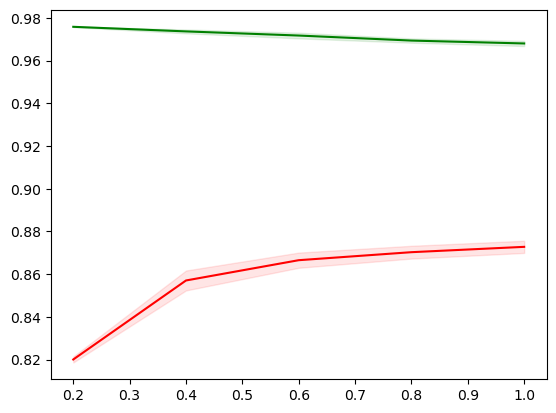

In [14]:
draw_learning_curve(best_l1_lr_model, X_train, y_train)

## L2 regularization

We do the same things from here

In [15]:
C_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    lr_model = LogisticRegression(C=c, penalty='l2', solver='lbfgs', multi_class='ovr')
    lr_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, lr_model.predict(X_train))
    cv_score = np.mean(cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[0.001, 0.01, 0.1, 1, 5, 10, 100]
[0.3386875, 0.3548125, 0.627375, 0.921625, 0.9884375, 0.9918125, 0.992625]
[0.3386875000000001, 0.33993749999999995, 0.5747500000000001, 0.8021874999999999, 0.8504375, 0.8563749999999999, 0.86075]


[Text(0, 0, '0.001'),
 Text(1, 0, '0.01'),
 Text(2, 0, '0.1'),
 Text(3, 0, '1'),
 Text(4, 0, '5'),
 Text(5, 0, '10'),
 Text(6, 0, '100')]

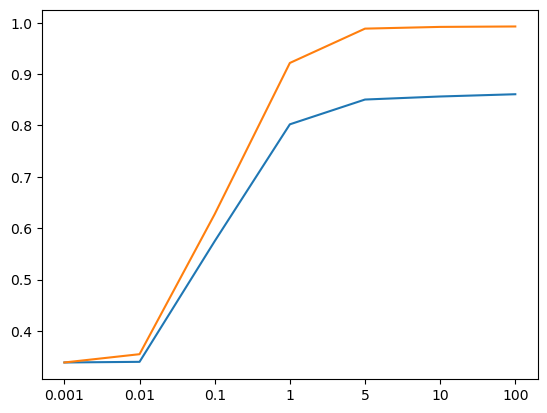

In [16]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

It looks like good $C$ is near $100$ or beyond

In [17]:
C_list = [100, 150, 200, 250, 300]

# Define a list in order to store accuracy points
cvs_list = list()
trs_list = list()

for c in C_list:
    # Define model for each C
    lr_model = LogisticRegression(C=c, penalty='l2', solver='lbfgs', multi_class='ovr')
    lr_model.fit(X_train, y_train)

    # Calculate score of cross validation
    train_score = accuracy_score(y_train, lr_model.predict(X_train))
    cv_score = np.mean(cross_val_score(lr_model, X_train, y_train, cv=5, n_jobs=8))

    trs_list.append(train_score)
    cvs_list.append(cv_score)

[100, 150, 200, 250, 300]
[0.992625, 0.992625, 0.992625, 0.992625, 0.992625]
[0.86075, 0.860125, 0.8616875, 0.8619375, 0.8614374999999999]


[Text(0, 0, '100'),
 Text(1, 0, '150'),
 Text(2, 0, '200'),
 Text(3, 0, '250'),
 Text(4, 0, '300')]

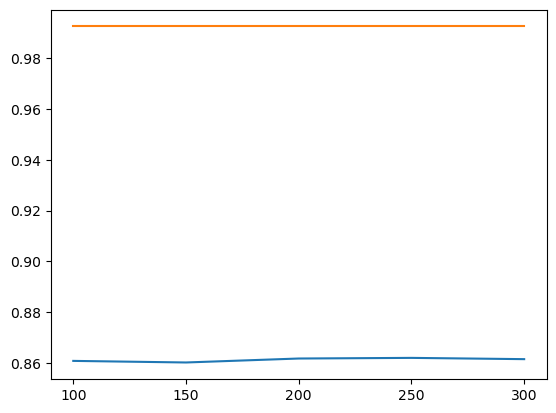

In [18]:
# Print the result
print(C_list)
print(trs_list)
print(cvs_list)

# Draw the plot
fig = sns.lineplot(x=list(range(len(C_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(C_list))), y=trs_list)
fig.set_xticks(range(len(C_list)))
fig.set_xticklabels(C_list)

We choose $C=250$

In [20]:
best_l2_lr_model = LogisticRegression(C=250, penalty='l2', solver='lbfgs', multi_class='ovr')

Score of on train are:
	- Accuracy score: 0.9926
	- Micro F1 score: 0.9926
	- Macro F1 score: 0.9906
Score of on test are:
	- Accuracy score: 0.8645
	- Micro F1 score: 0.8645
	- Macro F1 score: 0.8242


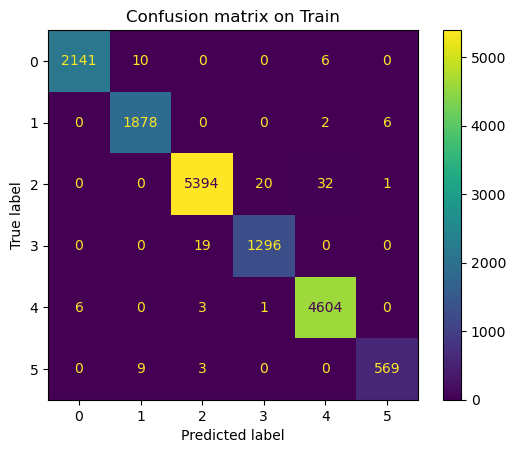

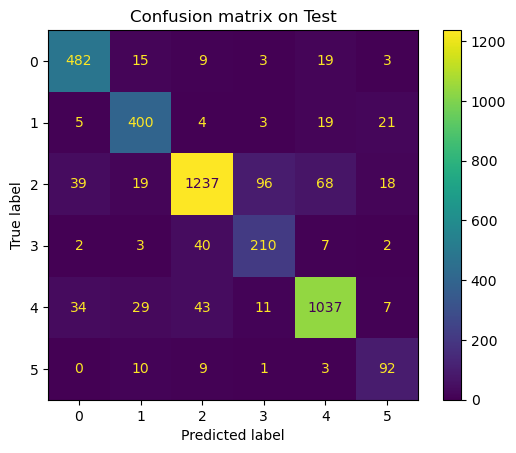

In [21]:
best_l2_lr_model.fit(X_train, y_train)
evaluate_model(best_l2_lr_model, X_train, X_test, y_train, y_test, include_training=True)

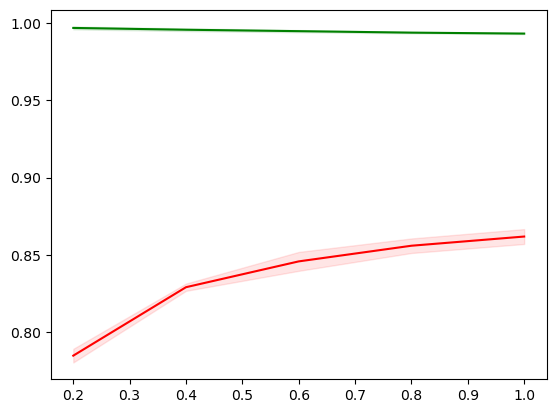

In [22]:
draw_learning_curve(best_l2_lr_model, X_train, y_train)

## Elastic regularization

In [4]:
dict_param = {
    'C' : [0.001, 0.01, 0.1, 1, 5, 10, 100],
    'l1_ratio' : np.linspace(0.1, 0.9, 5)
}

lr_model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='ovr')
grid_search = GridSearchCV(lr_model, dict_param, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr',
                                          penalty='elasticnet', solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='accuracy')

In [7]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    l1_ratio = [val['l1_ratio'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
print(df)
df = df[df['score'] < 0.86]
print("Bad hyperparameter:")
for param in dict_param:
  for value in dict_param[param]:
    if len(df[df[param] == value]) == 35 // len(dict_param[param]):
      print(param, value)

          C  l1_ratio     score
0     0.001       0.1  0.338688
1     0.001       0.3  0.338688
2     0.001       0.5  0.338688
3     0.001       0.7  0.328937
4     0.001       0.9  0.319312
5     0.010       0.1  0.338688
6     0.010       0.3  0.338688
7     0.010       0.5  0.338688
8     0.010       0.7  0.338688
9     0.010       0.9  0.338688
10    0.100       0.1  0.556750
11    0.100       0.3  0.513687
12    0.100       0.5  0.465438
13    0.100       0.7  0.421687
14    0.100       0.9  0.389500
15    1.000       0.1  0.810875
16    1.000       0.3  0.821937
17    1.000       0.5  0.830187
18    1.000       0.7  0.839438
19    1.000       0.9  0.856437
20    5.000       0.1  0.854688
21    5.000       0.3  0.862250
22    5.000       0.5  0.868125
23    5.000       0.7  0.872062
24    5.000       0.9  0.874500
25   10.000       0.1  0.859125
26   10.000       0.3  0.864750
27   10.000       0.5  0.870062
28   10.000       0.7  0.872687
29   10.000       0.9  0.874375
30  100.

In [16]:
dict_param = {
    'C' : np.logspace(1, 2, 6),
    'l1_ratio' : np.linspace(0.1, 0.9, 5)
}

lr_model = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='ovr')
grid_search = GridSearchCV(lr_model, dict_param, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(multi_class='ovr',
                                          penalty='elasticnet', solver='saga'),
             n_jobs=-1,
             param_grid={'C': array([ 10.        ,  15.84893192,  25.11886432,  39.81071706,
        63.09573445, 100.        ]),
                         'l1_ratio': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='accuracy')

In [17]:
df = pd.DataFrame(
  dict(
    C = [val['C'] for val in grid_search.cv_results_['params']],
    l1_ratio = [val['l1_ratio'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)
print(df)

             C  l1_ratio     score
0    10.000000       0.1  0.859125
1    10.000000       0.3  0.864625
2    10.000000       0.5  0.870125
3    10.000000       0.7  0.872750
4    10.000000       0.9  0.874125
5    15.848932       0.1  0.861437
6    15.848932       0.3  0.865500
7    15.848932       0.5  0.870750
8    15.848932       0.7  0.872250
9    15.848932       0.9  0.874188
10   25.118864       0.1  0.862188
11   25.118864       0.3  0.866062
12   25.118864       0.5  0.869250
13   25.118864       0.7  0.871750
14   25.118864       0.9  0.874875
15   39.810717       0.1  0.862187
16   39.810717       0.3  0.866187
17   39.810717       0.5  0.868812
18   39.810717       0.7  0.870937
19   39.810717       0.9  0.872750
20   63.095734       0.1  0.862562
21   63.095734       0.3  0.865375
22   63.095734       0.5  0.868563
23   63.095734       0.7  0.870875
24   63.095734       0.9  0.871312
25  100.000000       0.1  0.862563
26  100.000000       0.3  0.864812
27  100.000000      

In [18]:
print(grid_search.best_estimator_, grid_search.best_score_)

LogisticRegression(C=25.118864315095795, l1_ratio=0.9, multi_class='ovr',
                   penalty='elasticnet', solver='saga') 0.8748750000000001


In [19]:
best_en_lr_model = LogisticRegression(C=25.118864315095795, l1_ratio=0.9, multi_class='ovr',
                   penalty='elasticnet', solver='saga')

Score of on train are:
	- Accuracy score: 0.9926
	- Micro F1 score: 0.9926
	- Macro F1 score: 0.9906
Score of on test are:
	- Accuracy score: 0.8785
	- Micro F1 score: 0.8785
	- Macro F1 score: 0.8423


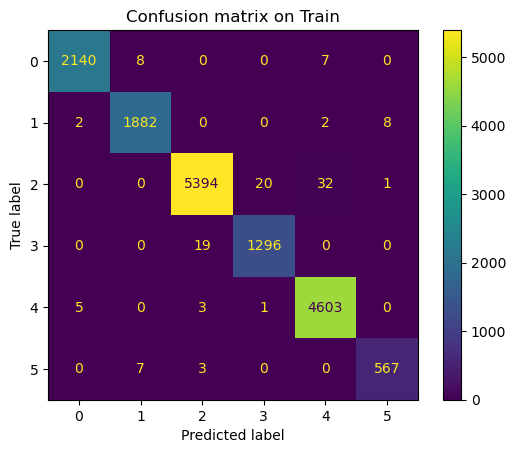

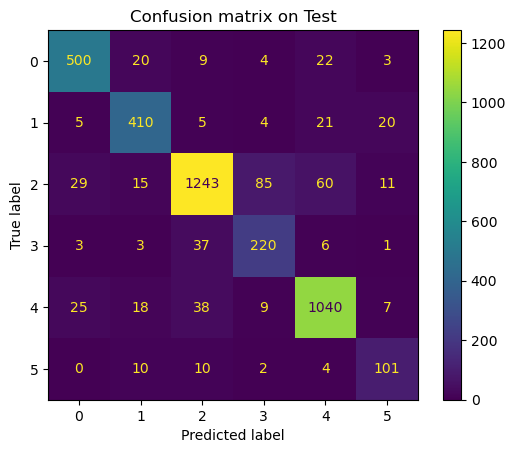

In [20]:
best_en_lr_model.fit(X_train, y_train)
evaluate_model(best_en_lr_model, X_train, X_test, y_train, y_test, include_training=True)

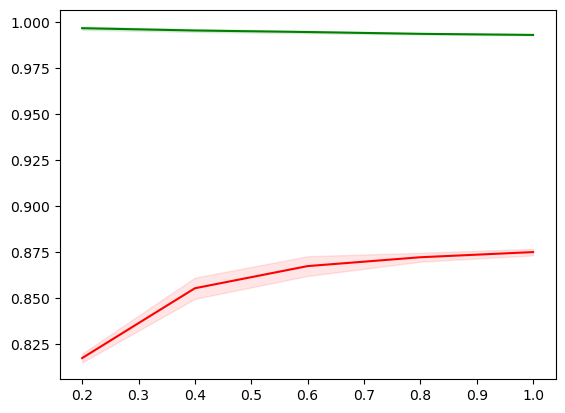

In [21]:
draw_learning_curve(best_en_lr_model, X_train, y_train)

# Conclusion

There are a few difference among the accuracy of these 3 regularization. However, Elastic-net regularization gives the best performance then I will choose it to be the best model in this notebook.

In [22]:
best_lr_model = best_en_lr_model

In [23]:
directory = "data/models/lr/"

dump(best_lr_model, directory + "best_lr_tfidf_model.joblib")

['data/models/lr/best_lr_tfidf_model.joblib']